# Classification Loan Status
we are going to work on binary classification problem, where we got some information about sample of peoples, and we need to predict whether we should give someone a loan or not depending on personal information. 

Our Dataset is very small(614) entries, so we wont be focusing on building the accurate prediction model.


The aim of this project is to
1. Practice EDA and Feature Engineering for classifier model
1. Learn and explore different classifier models and performance matrices.
2. How to build robust models using k-fold cross validation. 
3. Learn how to deploy these machine learning models using pickle in webapplication
4. Practice web application developmennt and deployment.

Dataset - https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset?select=train_u6lujuX_CVtuZ9i.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')
df


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

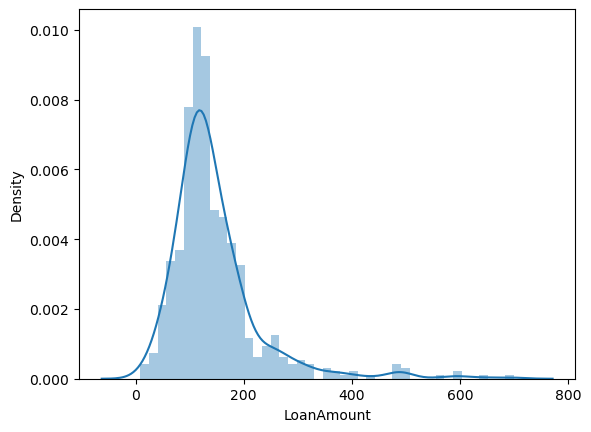

In [3]:
sns.distplot(df['LoanAmount'] )

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.Credit_History.unique()
# we will change the type of Credit_History to object becaues we can see that it is 1 or 0

df['Credit_History'] = df['Credit_History'].astype('O')
df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,564.0,614,614
unique,614,2,2,4,2,2,2.0,3,2
top,LP001002,Male,Yes,0,Graduate,No,1.0,Semiurban,Y
freq,1,489,398,345,480,500,475.0,233,422


The percentage of Y class : 0.69
The percentage of N class : 0.31


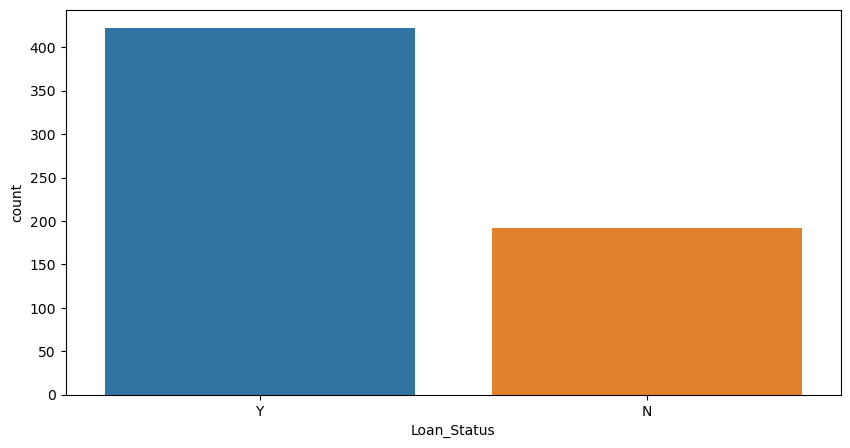

In [6]:
plt.figure(figsize = (10 , 5))
sns.countplot(df['Loan_Status']);
    
print('The percentage of Y class : %.2f' % (df['Loan_Status'].value_counts()[0] / len(df)))
print('The percentage of N class : %.2f' % (df['Loan_Status'].value_counts()[1] / len(df)))


# we can say data is balanced

The percentage with Credit History class : 0.77
The percentage of Credit History in approved loan class : 0.90
The percentage of Credit History in approved loan class : 0.51


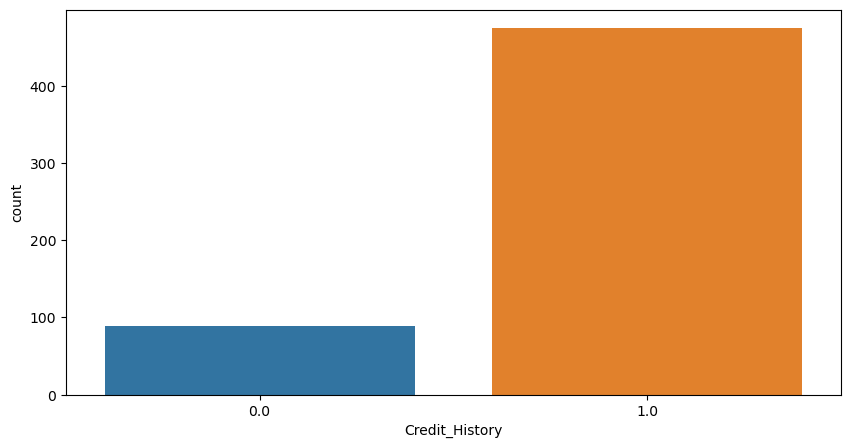

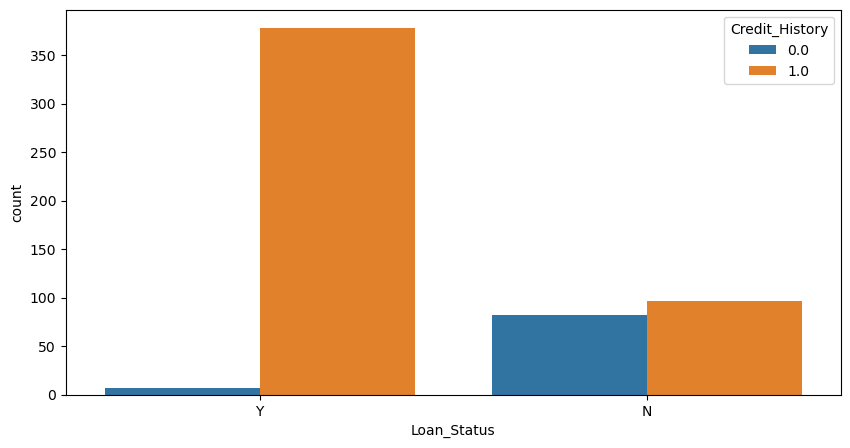

In [7]:

# Credit_History


# plt.figure(figsize=(8,6))
# grid = sns.FacetGrid(df,col='Loan_Status', size=3.2, aspect=1.6)
# grid.map(sns.countplot, 'CH_text');

plt.figure(figsize = (10 , 5))
sns.countplot(df['Credit_History']);
plt.figure(figsize = (10 , 5))
sns.countplot(x='Loan_Status', hue='Credit_History', data=df);

print('The percentage with Credit History class : %.2f' % (df['Credit_History'].value_counts()[1] / len(df)))

print('The percentage of Credit History in approved loan class : %.2f' % (df[df["Loan_Status"]=='Y']['Credit_History'].value_counts()[1] / len(df[df["Loan_Status"]=='Y'])))
print('The percentage of Credit History in approved loan class : %.2f' % (df[df["Loan_Status"]=='N']['Credit_History'].value_counts()[1] / len(df[df["Loan_Status"]=='N'])))

# we didn't give a loan for most people who got Credit History = 0 or N
# but we did give a loan for most of people who got Credit History = 1 or Y
# 90% of the people in so we can say if you got Credit History = 1 , you will have better chance to get a loan

# Dataset is unbalanced in terms of credit history - 85% of the data has credit history
#Even with this high number we see only 50% of the people with credit history getting their loans rejected. 
# This clearly tells us that having loan history reduces the chanes of loan rejection


# important feature

The percentage of male class : 0.80
The percentage male with approved loan class : 0.80
The percentage male with unapproved loan  class : 0.78


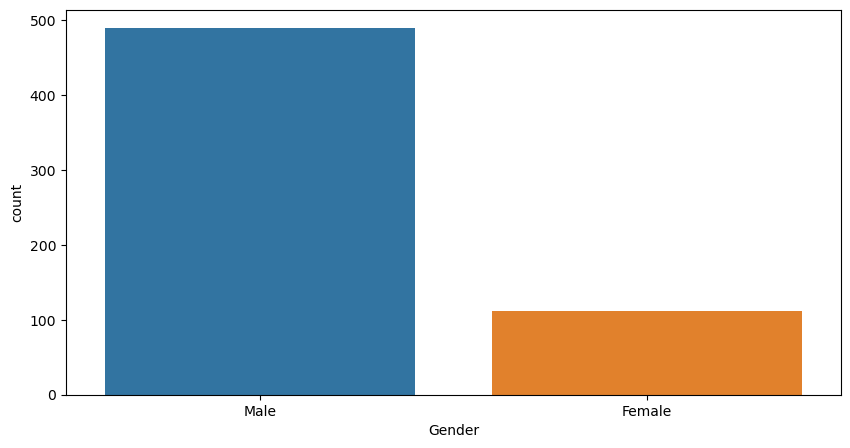

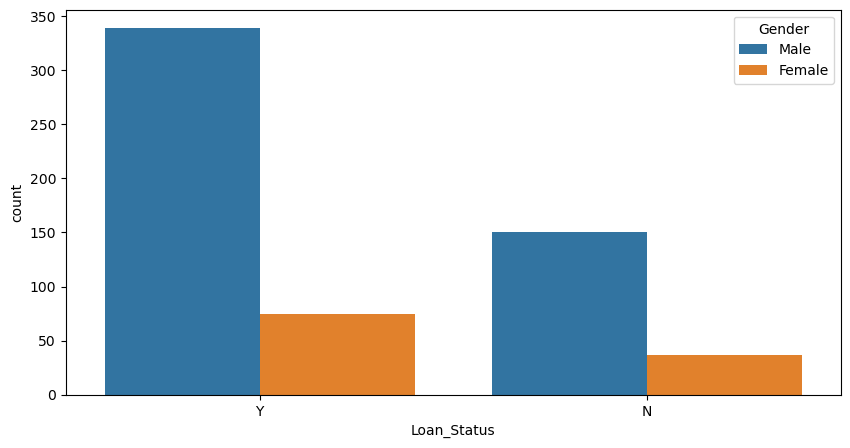

In [8]:
# Gender
plt.figure(figsize = (10 , 5))
sns.countplot(df['Gender']);

plt.figure(figsize = (10 , 5))
sns.countplot(x='Loan_Status', hue='Gender', data=df);

# grid = sns.FacetGrid(df,col='Loan_Status', size=3.2, aspect=1.6)
# grid.map(sns.countplot, 'Gender');

print('The percentage of male class : %.2f' % (df['Gender'].value_counts()[0] / len(df)))

print('The percentage male with approved loan class : %.2f' % (df[df["Loan_Status"]=='Y']['Gender'].value_counts()[0] / len(df[df["Loan_Status"]=='Y'])))
print('The percentage male with unapproved loan  class : %.2f' % (df[df["Loan_Status"]=='N']['Gender'].value_counts()[0] / len(df[df["Loan_Status"]=='N'])))


# i think it's not so important feature, we will see later


The percentage of married class : 0.65
The percentage married people in approved loan class : 0.68
The percentage married people in unapproved loan  class : 0.59


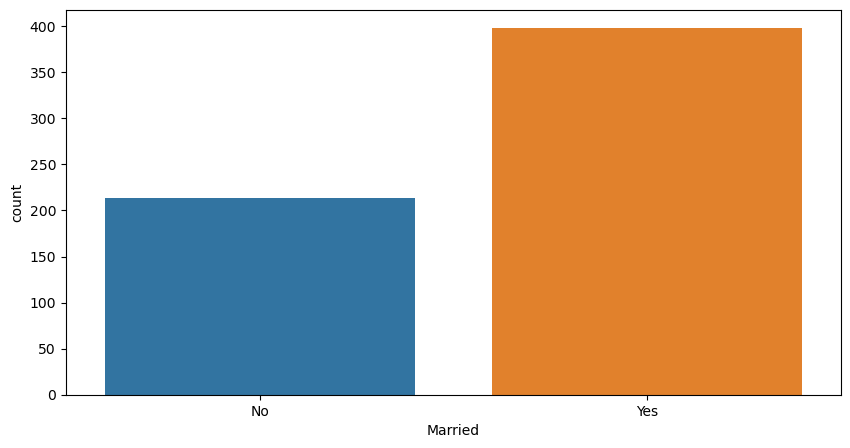

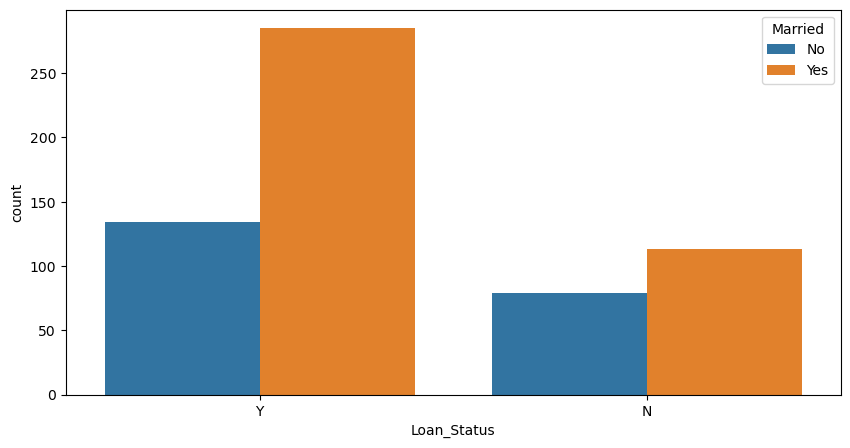

In [9]:
# Married
plt.figure(figsize = (10 , 5))
sns.countplot(df['Married']);


plt.figure(figsize = (10 , 5))
sns.countplot(x='Loan_Status', hue='Married', data=df);

print('The percentage of married class : %.2f' % (df['Married'].value_counts()[0] / len(df)))

print('The percentage married people in approved loan class : %.2f' % (df[df["Loan_Status"]=='Y']['Married'].value_counts()[0] / len(df[df["Loan_Status"]=='Y'])))
print('The percentage married people in unapproved loan  class : %.2f' % (df[df["Loan_Status"]=='N']['Married'].value_counts()[0] / len(df[df["Loan_Status"]=='N'])))

#  Didnt affect too much but we can still consider

The percentage of 0 dependents : 0.56
The percentage of 1 dependents : 0.17
The percentage of 2 dependents : 0.16
The percentage of 3 dependents : 0.08
The percentage 0 dependents in approved loan class : 0.56
The percentage 0 dependents in unapproved loan  class : 0.56
The percentage 1 dependents in approved loan class : 0.18
The percentage 1 dependents in unapproved loan  class : 0.19
The percentage 2 dependents in approved loan class : 0.16
The percentage 2 dependents in unapproved loan  class : 0.13
The percentage 3+ dependents in approved loan class : 0.08
The percentage 3+ dependents in unapproved loan  class : 0.09


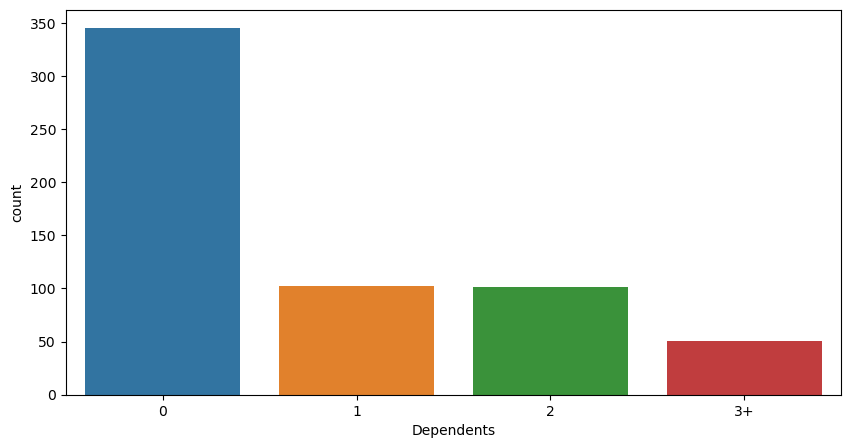

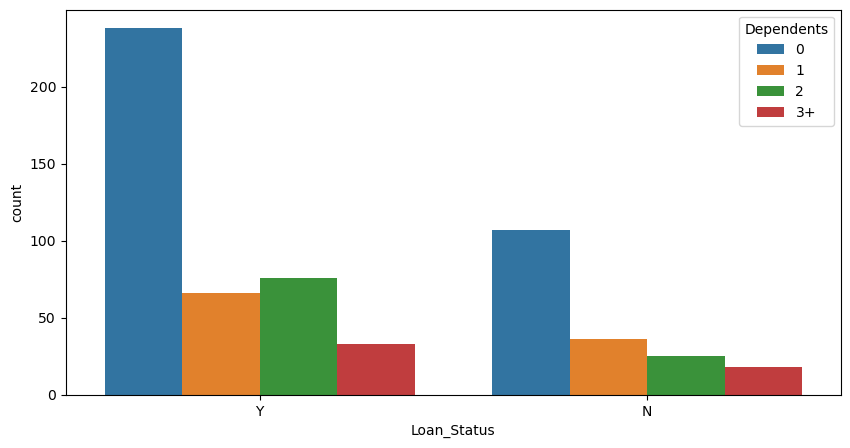

In [10]:
plt.figure(figsize = (10 , 5))
sns.countplot(df['Dependents']);

plt.figure(figsize = (10 , 5))
sns.countplot(x='Loan_Status', hue='Dependents', data=df);

# first if Dependents = 0 , we got higher chance to get a loan ((very hight chance))
# good feature

print('The percentage of 0 dependents : %.2f' % (df['Dependents'].value_counts()[0] / len(df)))
print('The percentage of 1 dependents : %.2f' % (df['Dependents'].value_counts()[1] / len(df)))
print('The percentage of 2 dependents : %.2f' % (df['Dependents'].value_counts()[2] / len(df)))
print('The percentage of 3 dependents : %.2f' % (df['Dependents'].value_counts()[3] / len(df)))

print('The percentage 0 dependents in approved loan class : %.2f' % (df[df["Loan_Status"]=='Y']['Dependents'].value_counts()[0] / len(df[df["Loan_Status"]=='Y'])))
print('The percentage 0 dependents in unapproved loan  class : %.2f' % (df[df["Loan_Status"]=='N']['Dependents'].value_counts()[0] / len(df[df["Loan_Status"]=='N'])))

print('The percentage 1 dependents in approved loan class : %.2f' % (df[df["Loan_Status"]=='Y']['Dependents'].value_counts()[1] / len(df[df["Loan_Status"]=='Y'])))
print('The percentage 1 dependents in unapproved loan  class : %.2f' % (df[df["Loan_Status"]=='N']['Dependents'].value_counts()[1] / len(df[df["Loan_Status"]=='N'])))

print('The percentage 2 dependents in approved loan class : %.2f' % (df[df["Loan_Status"]=='Y']['Dependents'].value_counts()[2] / len(df[df["Loan_Status"]=='Y'])))
print('The percentage 2 dependents in unapproved loan  class : %.2f' % (df[df["Loan_Status"]=='N']['Dependents'].value_counts()[2] / len(df[df["Loan_Status"]=='N'])))

print('The percentage 3+ dependents in approved loan class : %.2f' % (df[df["Loan_Status"]=='Y']['Dependents'].value_counts()[3] / len(df[df["Loan_Status"]=='Y'])))
print('The percentage 3+ dependents in unapproved loan  class : %.2f' % (df[df["Loan_Status"]=='N']['Dependents'].value_counts()[3] / len(df[df["Loan_Status"]=='N'])))


# Distribution remains the same - probabaly doesnt affect much

The percentage of graduates in a dataset : 0.78
The percentage graduates in approved loan class : 0.81
The percentage graduates in unapproved loan  class : 0.73


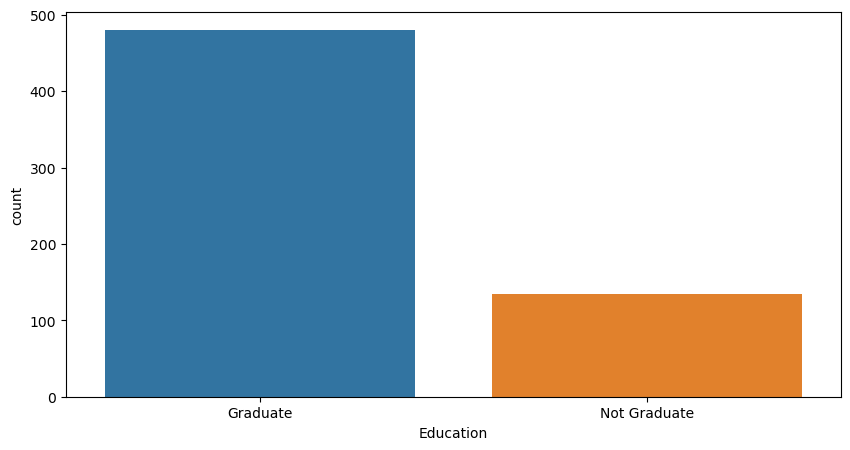

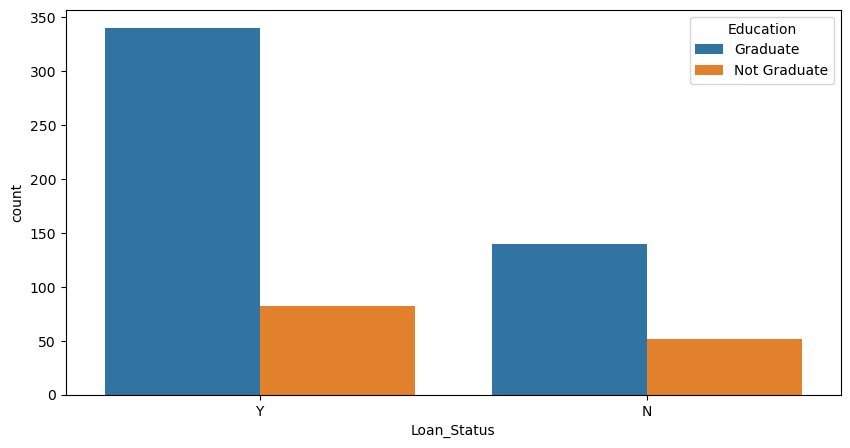

In [11]:
# Education

plt.figure(figsize = (10 , 5))
sns.countplot(df['Education']);

plt.figure(figsize = (10 , 5))
sns.countplot(x='Loan_Status', hue='Education', data=df);

print('The percentage of graduates in a dataset : %.2f' % (df['Education'].value_counts()[0] / len(df)))

print('The percentage graduates in approved loan class : %.2f' % (df[df["Loan_Status"]=='Y']['Education'].value_counts()[0] / len(df[df["Loan_Status"]=='Y'])))
print('The percentage graduates in unapproved loan  class : %.2f' % (df[df["Loan_Status"]=='N']['Education'].value_counts()[0] / len(df[df["Loan_Status"]=='N'])))


# grid = sns.FacetGrid(df,col='Loan_Status', size=3.2, aspect=1.6)
# grid.map(sns.countplot, 'Education');

# If you are graduated or not, you will get almost the same chance to get a loan (No pattern)
# Here you can see that most people did graduated, and most of them got a loan
# on the other hand, most of people who did't graduate also got a loan, but with less percentage from people who graduated

#changed a little

The percentage of Self_Employed in a dataset : 0.81
The percentage ofSelf_Employed in approved loan class : 0.81
The percentage of Self_Employed in unapproved loan  class : 0.82


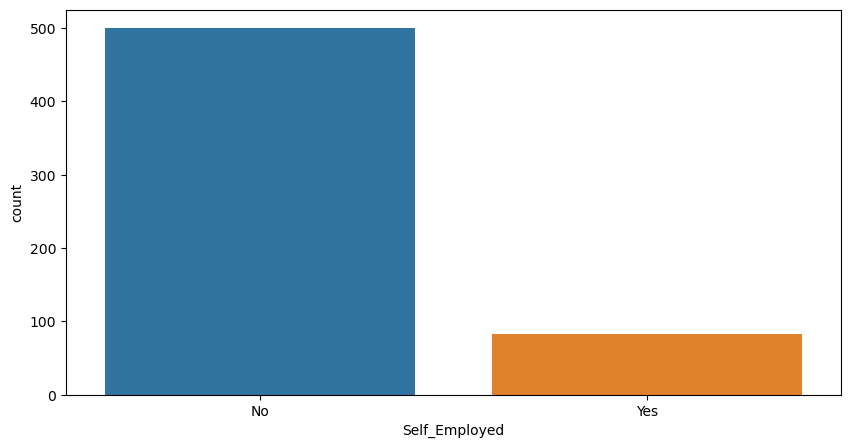

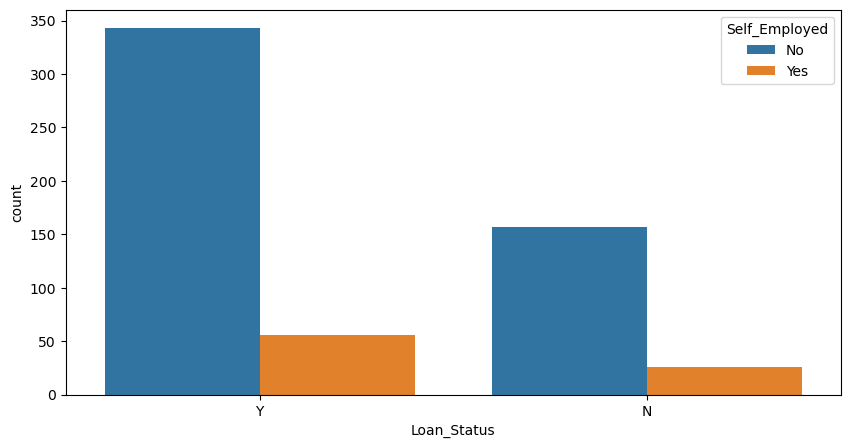

In [12]:
# Self_Employed
plt.figure(figsize = (10 , 5))
sns.countplot(df['Self_Employed']);

plt.figure(figsize = (10 , 5))
sns.countplot(x='Loan_Status', hue='Self_Employed', data=df);

print('The percentage of Self_Employed in a dataset : %.2f' % (df['Self_Employed'].value_counts()[0] / len(df)))
print('The percentage ofSelf_Employed in approved loan class : %.2f' % (df[df["Loan_Status"]=='Y']['Self_Employed'].value_counts()[0] / len(df[df["Loan_Status"]=='Y'])))
print('The percentage of Self_Employed in unapproved loan  class : %.2f' % (df[df["Loan_Status"]=='N']['Self_Employed'].value_counts()[0] / len(df[df["Loan_Status"]=='N'])))


# grid = sns.FacetGrid(df,col='Loan_Status', size=3.2, aspect=1.6)
# grid.map(sns.countplot, 'Self_Employed');


# No pattern (same as Education)

The percentage of Semiurban : 0.38
The percentage of Urban : 0.33
The percentage of Rural : 0.29
The percentage Semiurban in approved loan class : 0.42
The percentage Semiurban in unapproved loan  class : 0.36
The percentage Urban in approved loan class : 0.32
The percentage Urban in unapproved loan  class : 0.36
The percentage Rural in approved loan class : 0.26
The percentage Rural in unapproved loan  class : 0.28


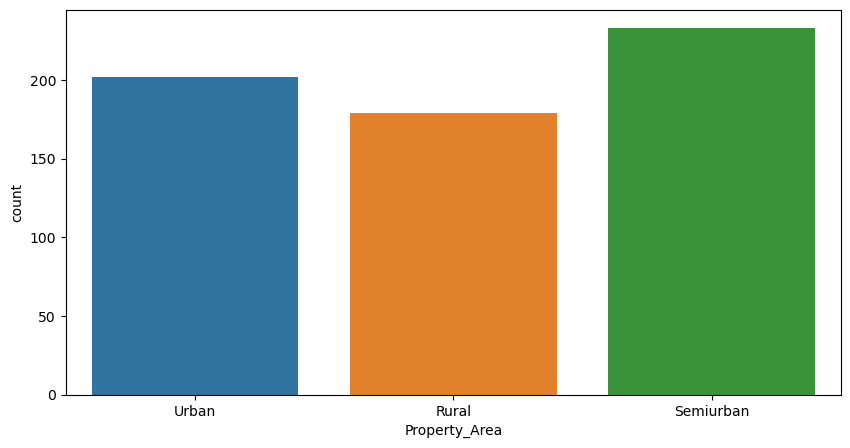

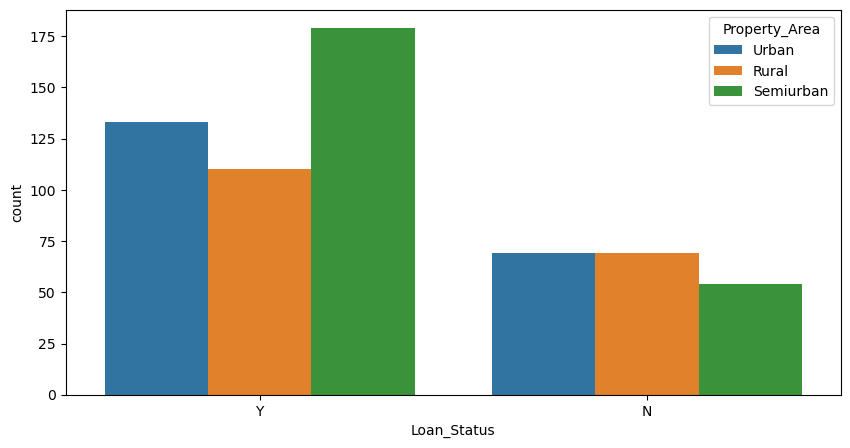

In [13]:
# Property_Area


plt.figure(figsize = (10 , 5))
sns.countplot(df['Property_Area']);

plt.figure(figsize = (10 , 5))
sns.countplot(x='Loan_Status', hue='Property_Area', data=df);

# first if Dependents = 0 , we got higher chance to get a loan ((very hight chance))
# good feature

print('The percentage of Semiurban : %.2f' % (df['Property_Area'].value_counts()[0] / len(df)))
print('The percentage of Urban : %.2f' % (df['Property_Area'].value_counts()[1] / len(df)))
print('The percentage of Rural : %.2f' % (df['Property_Area'].value_counts()[2] / len(df)))


print('The percentage Semiurban in approved loan class : %.2f' % (df[df["Loan_Status"]=='Y']['Property_Area'].value_counts()[0] / len(df[df["Loan_Status"]=='Y'])))
print('The percentage Semiurban in unapproved loan  class : %.2f' % (df[df["Loan_Status"]=='N']['Property_Area'].value_counts()[0] / len(df[df["Loan_Status"]=='N'])))

print('The percentage Urban in approved loan class : %.2f' % (df[df["Loan_Status"]=='Y']['Property_Area'].value_counts()[1] / len(df[df["Loan_Status"]=='Y'])))
print('The percentage Urban in unapproved loan  class : %.2f' % (df[df["Loan_Status"]=='N']['Property_Area'].value_counts()[1] / len(df[df["Loan_Status"]=='N'])))

print('The percentage Rural in approved loan class : %.2f' % (df[df["Loan_Status"]=='Y']['Property_Area'].value_counts()[2] / len(df[df["Loan_Status"]=='Y'])))
print('The percentage Rural in unapproved loan  class : %.2f' % (df[df["Loan_Status"]=='N']['Property_Area'].value_counts()[2] / len(df[df["Loan_Status"]=='N'])))


# We can say, Semiurban Property_Area got more than 50% than urban chance to get a loan



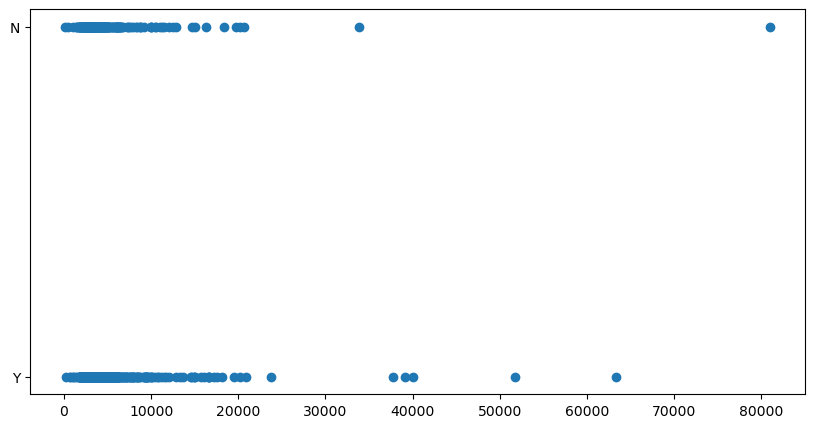

In [15]:
# ApplicantIncome
plt.figure(figsize = (10 , 5))
plt.scatter(df['ApplicantIncome'], df['Loan_Status']);

# Higher income people have low rejection rate

In [16]:
# the numerical data

df.groupby('Loan_Status').mean()
df.groupby('Loan_Status').median() # median because Not affected with outliers

#df[df["Loan_Status"]=='Y'].describe()
# we can see that when we got low median in CoapplicantInocme we got Loan_Status = N

# CoapplicantInocme is a good feature

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Loan_Status,,,,
N,3833.5,268.0,129.0,360.0
Y,3812.5,1239.5,126.0,360.0


In [17]:
x = df.copy()
x.CoapplicantIncome
x["LoanperIncome"] = x.LoanAmount/x.ApplicantIncome

x.groupby('Loan_Status').mean()



# higher loan amount compared to their salary

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,LoanperIncome
Loan_Status,,,,,
N,5446.078125,1877.807292,151.220994,344.064516,0.044480
Y,5384.068720,1504.516398,144.294404,341.072464,0.035587


#### Missing values

In [18]:
df.isnull().sum().sort_values(ascending=False)
df = df.dropna()
df.isnull().sum().sort_values(ascending=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    object 
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 52.5+ KB


In [19]:
df.drop(['Loan_ID','Gender','Dependents','Self_Employed'],axis=1,inplace=True)
data = df
data = data.reset_index(drop=True)
data


,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Yes,Graduate,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Yes,Graduate,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Yes,Not Graduate,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,No,Graduate,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Yes,Graduate,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...
475,No,Graduate,2900,0.0,71.0,360.0,1.0,Rural,Y
476,Yes,Graduate,4106,0.0,40.0,180.0,1.0,Rural,Y
477,Yes,Graduate,8072,240.0,253.0,360.0,1.0,Urban,Y
478,Yes,Graduate,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
data

In [20]:
from sklearn.preprocessing import LabelEncoder  
## sometimes better to use map rather than labelencoder because
le = LabelEncoder()
#data.Gender = le.fit_transform(data.Gender)
data.Married = le.fit_transform(data.Married)
#data.Dependents = le.fit_transform(data.Dependents)
data.Education = le.fit_transform(data.Education)
#data.Self_Employed = le.fit_transform(data.Self_Employed)
data.Credit_History = le.fit_transform(data.Credit_History)
data.Property_Area = le.fit_transform(data.Property_Area)
data.Loan_Status = le.fit_transform(data.Loan_Status)
data

,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,4583,1508.0,128.0,360.0,1,0,0
1,1,0,3000,0.0,66.0,360.0,1,2,1
2,1,1,2583,2358.0,120.0,360.0,1,2,1
3,0,0,6000,0.0,141.0,360.0,1,2,1
4,1,0,5417,4196.0,267.0,360.0,1,2,1
...,...,...,...,...,...,...,...,...,...
475,0,0,2900,0.0,71.0,360.0,1,0,1
476,1,0,4106,0.0,40.0,180.0,1,0,1
477,1,0,8072,240.0,253.0,360.0,1,2,1
478,1,0,7583,0.0,187.0,360.0,1,2,1


In [21]:
data.describe()

,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.647917,0.202083,5364.231250,1581.093583,144.735417,342.050000,0.854167,1.022917,0.691667
std,0.478118,0.401973,5668.251251,2617.692267,80.508164,65.212401,0.353307,0.776411,0.462287
min,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2898.750000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,0.000000,3859.000000,1084.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,0.000000,5852.500000,2253.250000,170.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,81000.000000,33837.000000,600.000000,480.000000,1.000000,2.000000,1.000000


In [22]:
data.info()
data.Loan_Status.unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Married            480 non-null    int32  
 1   Education          480 non-null    int32  
 2   ApplicantIncome    480 non-null    int64  
 3   CoapplicantIncome  480 non-null    float64
 4   LoanAmount         480 non-null    float64
 5   Loan_Amount_Term   480 non-null    float64
 6   Credit_History     480 non-null    int32  
 7   Property_Area      480 non-null    int32  
 8   Loan_Status        480 non-null    int32  
dtypes: float64(3), int32(5), int64(1)
memory usage: 24.5 KB


array([0, 1])

In [23]:
X = data.drop('Loan_Status',axis=1)
#X = data.drop(['Loan_Status','CH_text'],axis=1)
y = data.Loan_Status

#### LEts prepare the model 
#### split data into test train

In [24]:
# we will use StratifiedShuffleSplit to split the data Taking into consideration that we will get the same ratio on the target column
# StratifiedShuffleSplit will split the data in the same ratio it existed in originaldf.

from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train, test in sss.split(X, y):
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
    
print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

# almost same ratio
print('\nratio of target in y_train :',y_train.value_counts().values/ len(y_train))
print('ratio of target in y_test :',y_test.value_counts().values/ len(y_test))
print('ratio of target in original_data :',df['Loan_Status'].value_counts().values/ len(df))


# ###  simple 
# from sklearn.model_selection import train_test_split # you can use simple splitting
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# # almost same ratio
# print('\nratio of target in y_train :',y_train.value_counts().values/ len(y_train))
# print('ratio of target in y_test :',y_test.value_counts().values/ len(y_test))
# print('ratio of target in original_data :',df['Loan_Status'].value_counts().values/ len(df))

X_train shape (384, 8)
y_train shape (384,)
X_test shape (96, 8)
y_test shape (96,)

ratio of target in y_train : [0.69270833 0.30729167]
ratio of target in y_test : [0.6875 0.3125]
ratio of target in original_data : [0.69166667 0.30833333]


In [ ]:
X_test 

In [25]:
# #ML models

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


#relevant ML librariesv To evaluate our model 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


In [26]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

y_predict = LR.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
print(f"{round(accuracy_score(y_predict,y_test)*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.85      0.57      0.68        30
           1       0.83      0.95      0.89        66

    accuracy                           0.83        96
   macro avg       0.84      0.76      0.78        96
weighted avg       0.84      0.83      0.82        96

83.33% Accurate


In [27]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

y_predict = KNN.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
print(f"{round(accuracy_score(y_predict,y_test)*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.32      0.20      0.24        30
           1       0.69      0.80      0.74        66

    accuracy                           0.61        96
   macro avg       0.50      0.50      0.49        96
weighted avg       0.57      0.61      0.59        96

61.46% Accurate


In [28]:
DT = DecisionTreeClassifier(random_state=0)
DT.fit(X_train, y_train)

y_predict = DT.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
print(f"{round(accuracy_score(y_predict,y_test)*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.59      0.67      0.62        30
           1       0.84      0.79      0.81        66

    accuracy                           0.75        96
   macro avg       0.71      0.73      0.72        96
weighted avg       0.76      0.75      0.75        96

75.0% Accurate


In [29]:
RF = RandomForestClassifier(random_state = 0)
RF.fit(X_train, y_train)

y_predict = RF.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
RF_SC = accuracy_score(y_predict,y_test)
print(f"{round(RF_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.70      0.70      0.70        30
           1       0.86      0.86      0.86        66

    accuracy                           0.81        96
   macro avg       0.78      0.78      0.78        96
weighted avg       0.81      0.81      0.81        96

81.25% Accurate


In [30]:
XGB = XGBClassifier()
XGB.fit(X_train, y_train)

y_predict = XGB.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
XGB_SC = accuracy_score(y_predict,y_test)
print(f"{round(XGB_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.59      0.67      0.62        30
           1       0.84      0.79      0.81        66

    accuracy                           0.75        96
   macro avg       0.71      0.73      0.72        96
weighted avg       0.76      0.75      0.75        96

75.0% Accurate


In [33]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
from sklearn.model_selection import cross_val_score

Accuracy_XGB = (cross_val_score(XGBClassifier(), X, y, cv=cv)).mean()
Accuracy_RF = (cross_val_score(RandomForestClassifier(), X, y, cv=cv)).mean()
Accuracy_DT = (cross_val_score(DecisionTreeClassifier(), X, y, cv=cv)).mean()
Accuracy_KNN = (cross_val_score(KNeighborsClassifier(), X, y, cv=cv)).mean()
Accuracy_LR = (cross_val_score(LogisticRegression(), X, y, cv=cv)).mean()

print ("XGB",Accuracy_XGB)
print ("RF",Accuracy_RF)
print ("DT",Accuracy_DT)
print ("KNN",Accuracy_KNN)
print ("LR",Accuracy_LR)


XGB 0.75625
RF 0.76875
DT 0.7020833333333333
KNN 0.6375
LR 0.7666666666666668


# Model Deployment

1. First we will have to export models using pickle
2. Build streamlit app - the code will be in clustering_streamlit_app.py
3. Learn how to deploy the app on the heroku server - references

Link to app -

In [ ]:
import pickle

pickle.dump(XGB, open('xgb.pkl', 'wb'))
pickle.dump(RF, open('RF.pkl', 'wb'))
pickle.dump(LR, open('LR.pkl', 'wb'))


In [ ]:
LR_model = pickle.load(open('LR.pkl', 'rb'))

In [ ]:
XGB_model = pickle.load(open('xgb.pkl', 'rb'))


In [ ]:
XGB_model.predict(X_test)

In [ ]:
a = np.array([1,0,3089,1280,121,360,0,2])
a = np.expand_dims(a, 0)
XGB_model.predict(a)

In [ ]:
XGB_model.predict(a)[0]


In [ ]:
X_test.iloc[1]

In [ ]:
df.iloc[420]
# Married - Yes - 1
# Education - Not Graduate - 1
# Property  - Semiurban - 1 , urban 2


In [ ]:
y_test

In [ ]:
Applicant monthly income - 5200, credit history no